In [98]:
import pandas as pd 
import os 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib


In [31]:
file_path = 'C:/Users/ChazinBrahma/Downloads/archive (25)/loan_default.csv'
lending_df = pd.read_csv(file_path)

In [32]:
lending_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [33]:
if os.path.exists(file_path):
    print("File path is correct.")
else: 
    print("File path is incorrect.")

File path is correct.


In [34]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [35]:
missing_values = lending_df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


In [47]:
lending_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [48]:
lending_df.dropna(axis=0, how='any', inplace=True)

lending_df.drop_duplicates()
lending_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [49]:
X = lending_df.drop(['Default'], axis=1)
X = X.drop ('LoanID', axis=1)
y = lending_df['Default']

In [50]:
lending_df.shape

(255347, 18)

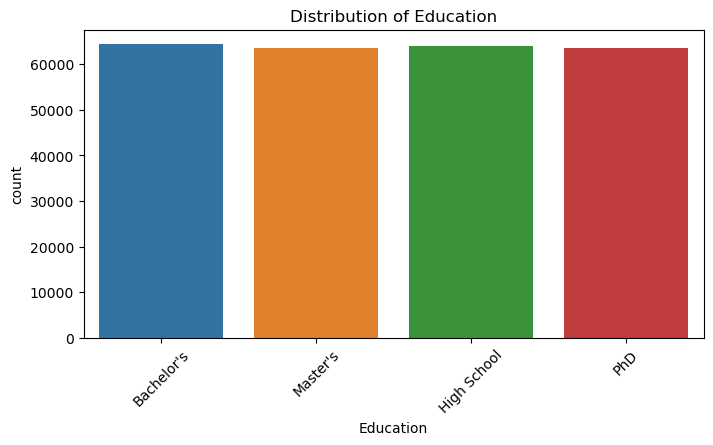

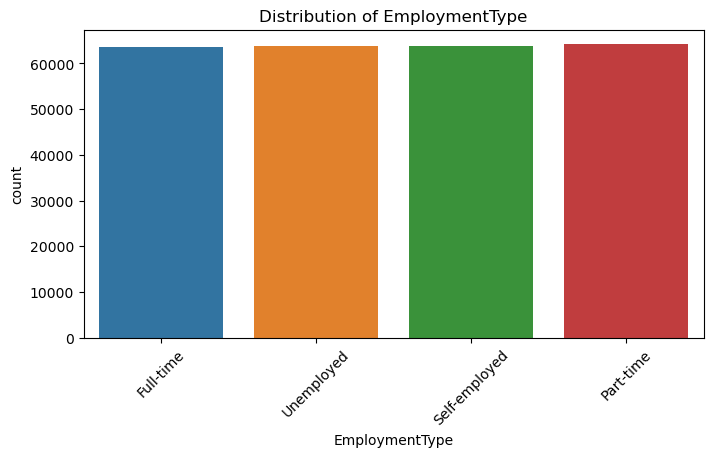

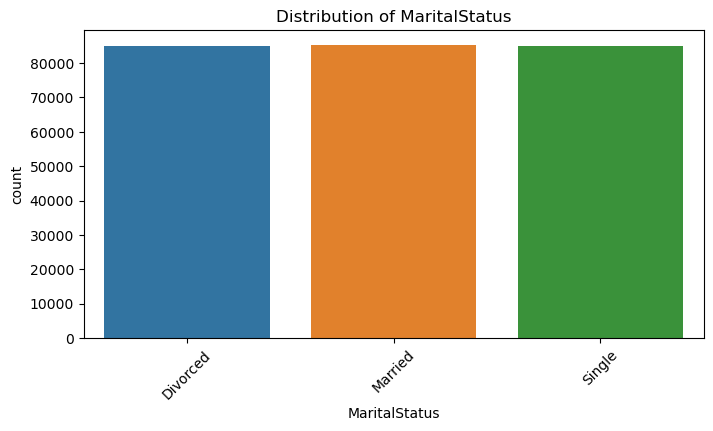

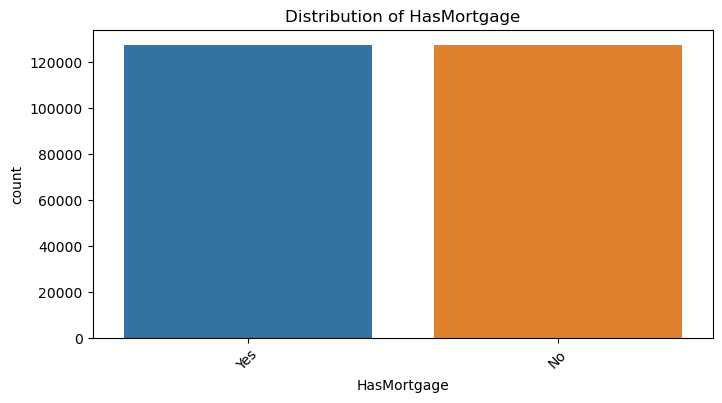

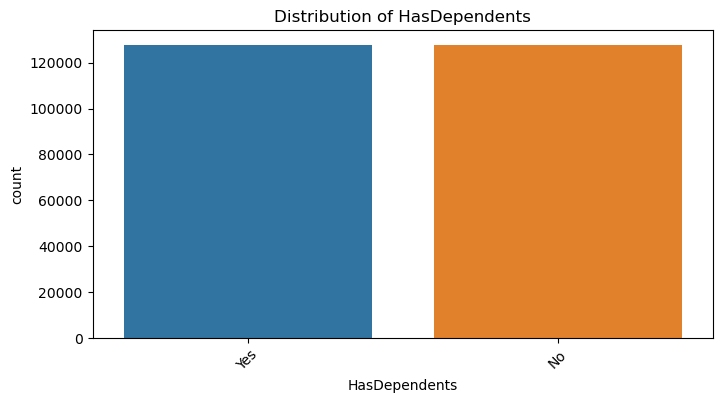

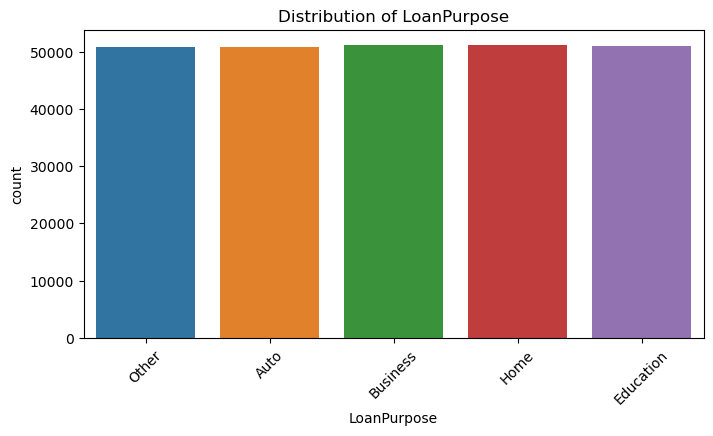

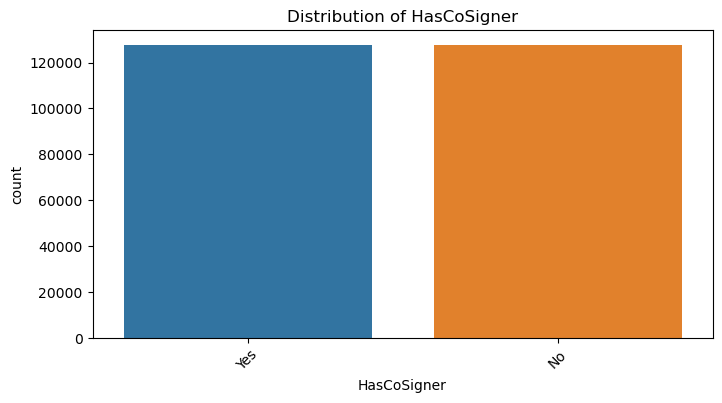

In [51]:
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for col in categorical_columns: 
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=lending_df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


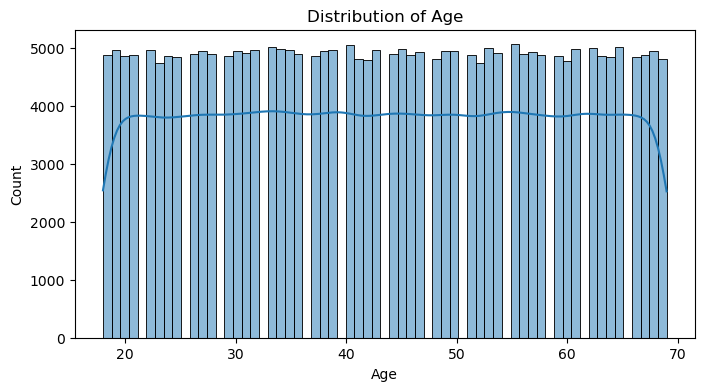

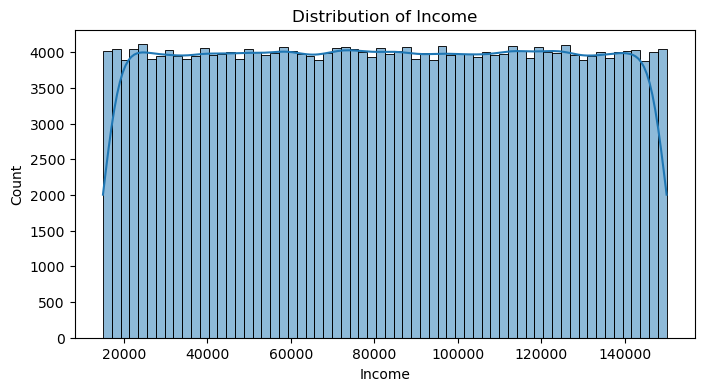

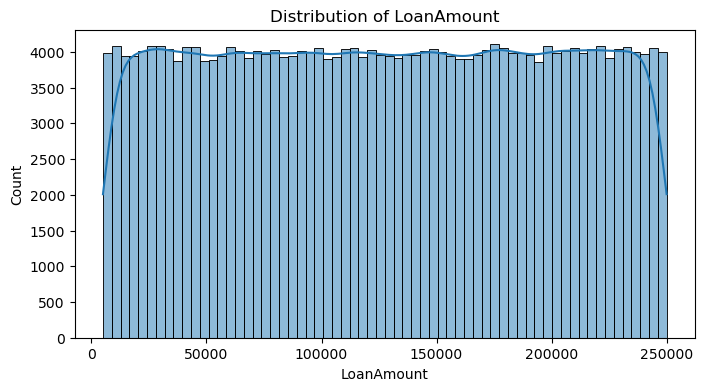

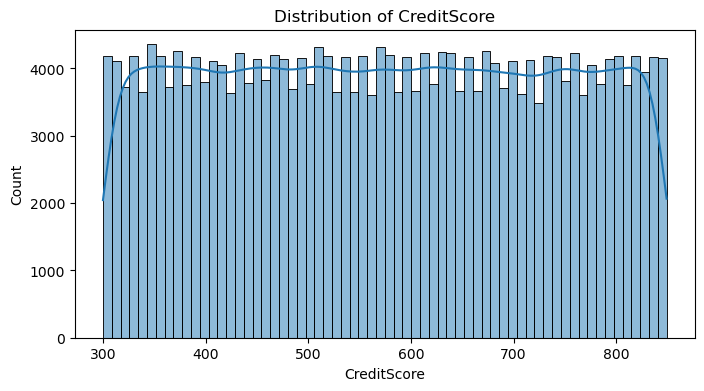

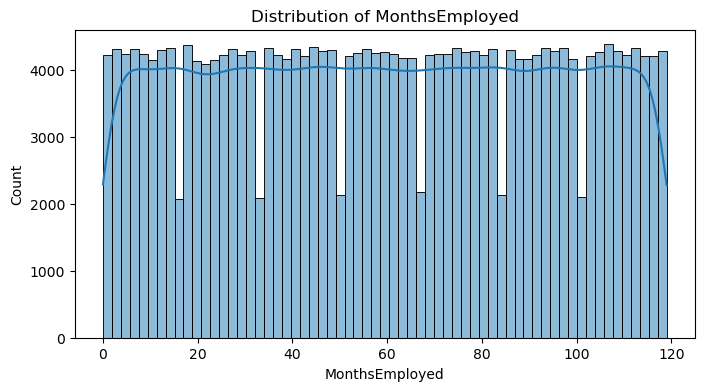

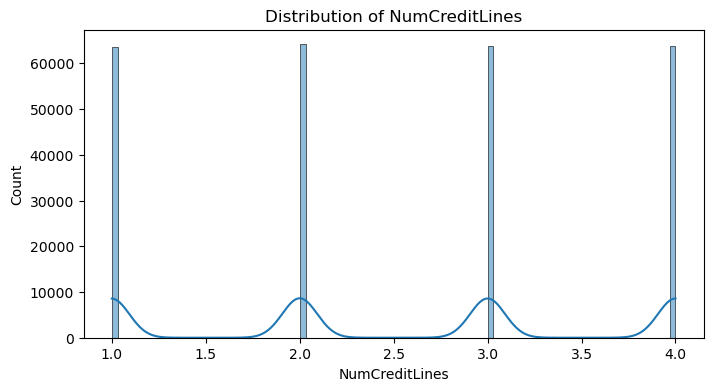

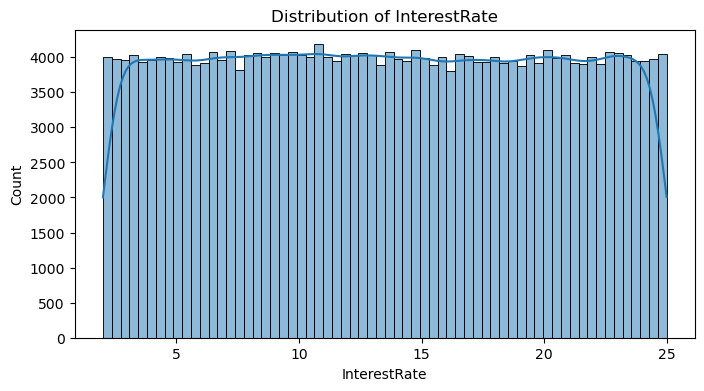

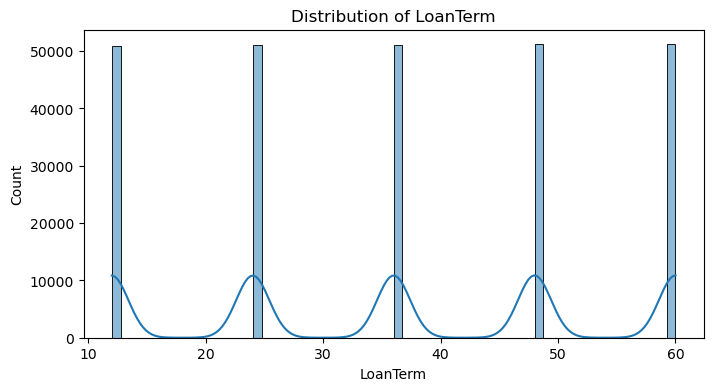

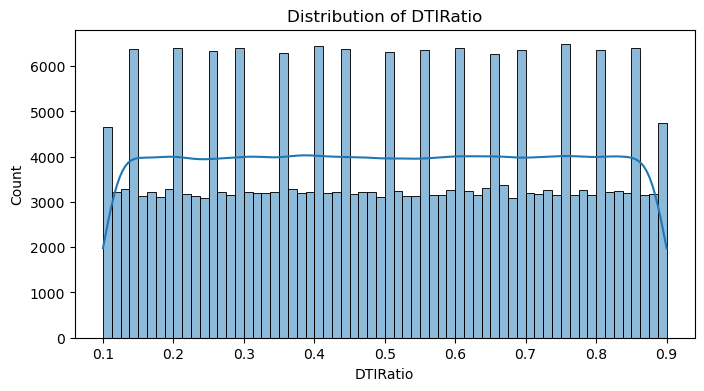

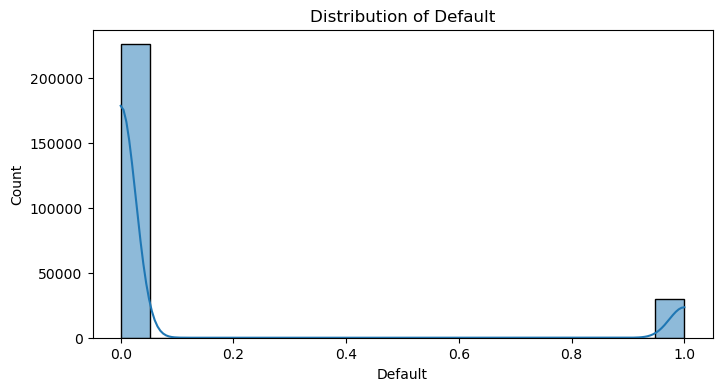

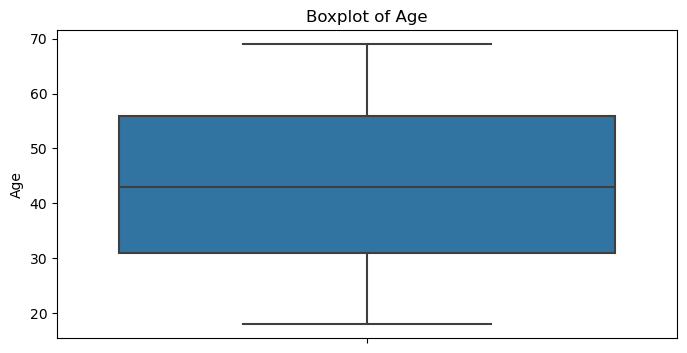

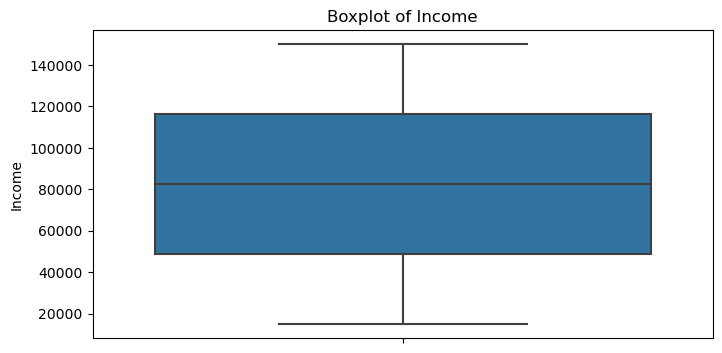

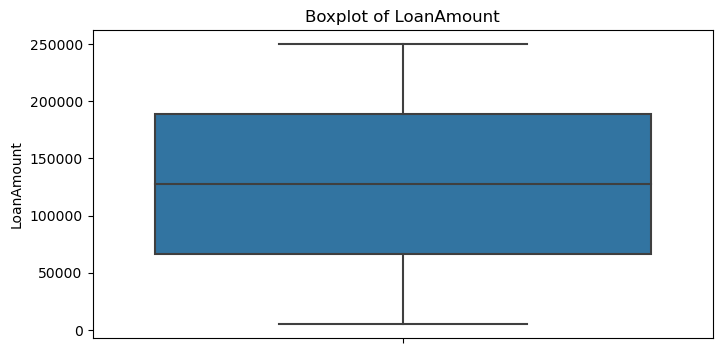

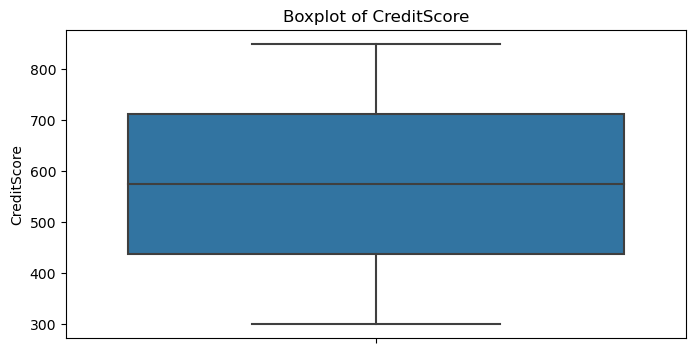

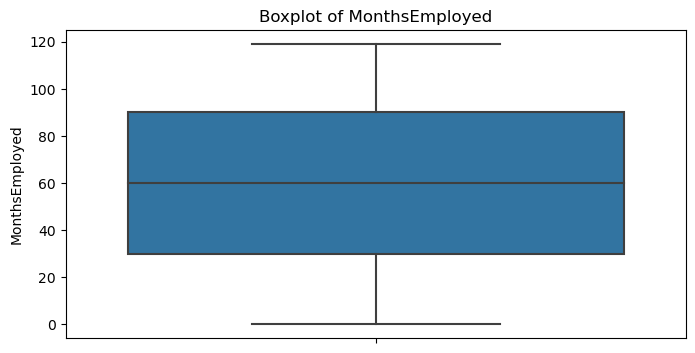

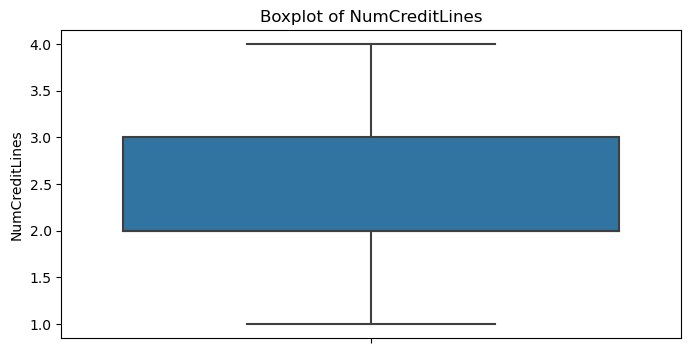

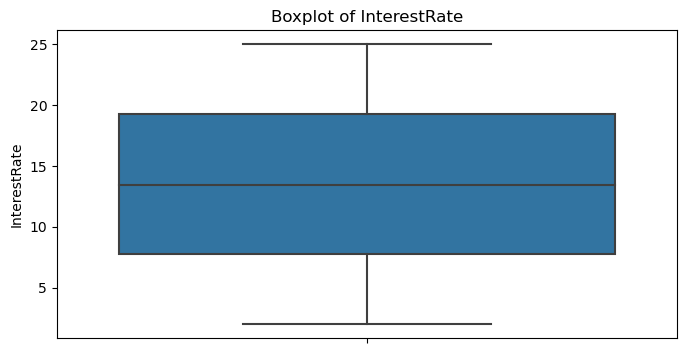

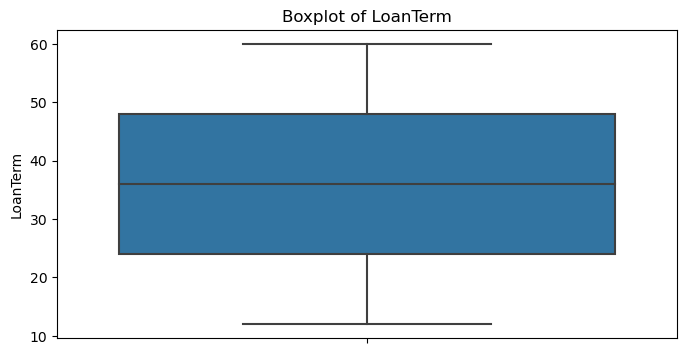

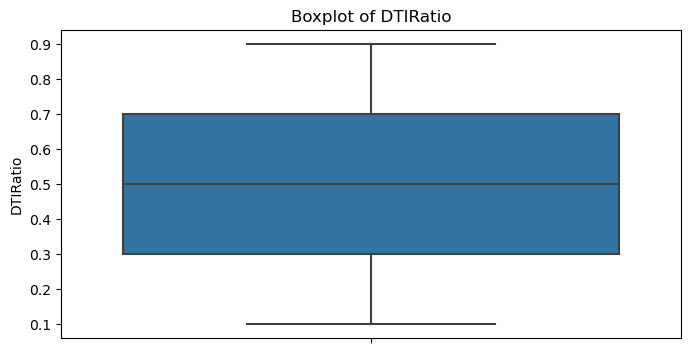

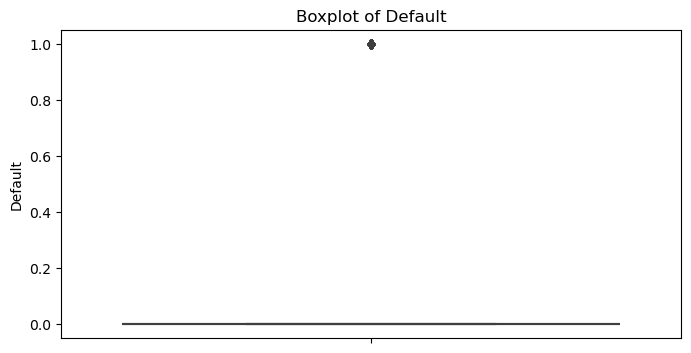

In [52]:
numerical_columns = lending_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns: 
    plt.figure(figsize=(8,4))
    sns.histplot(lending_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in numerical_columns: 
    plt.figure(figsize=(8,4))
    sns.boxplot(y=lending_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    

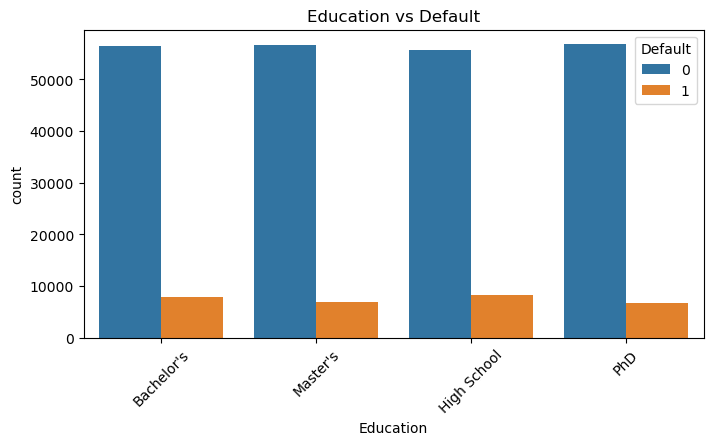

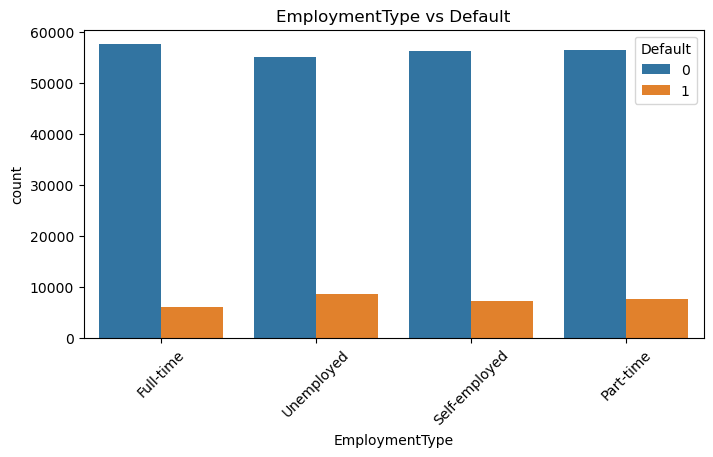

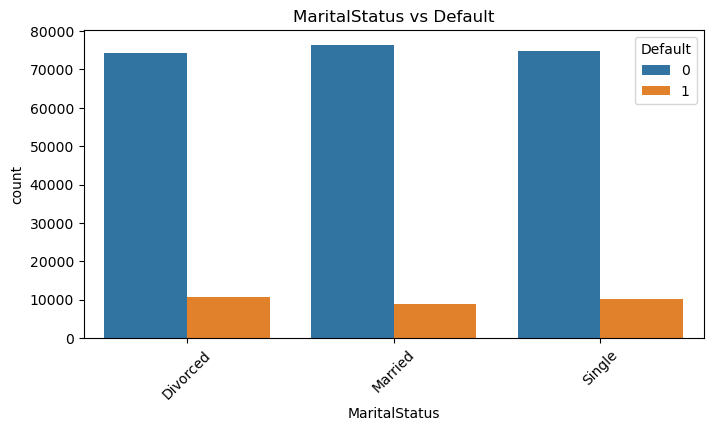

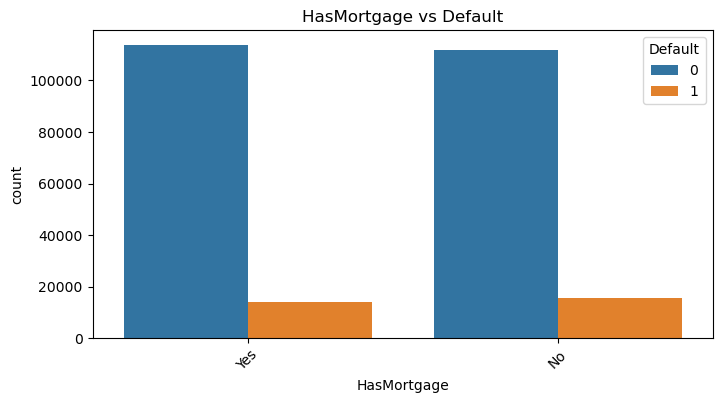

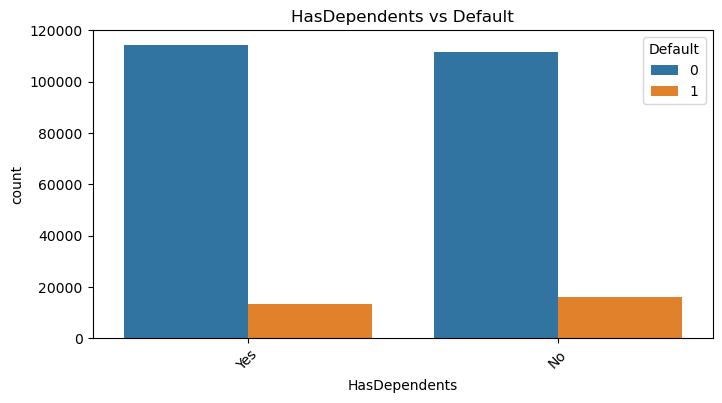

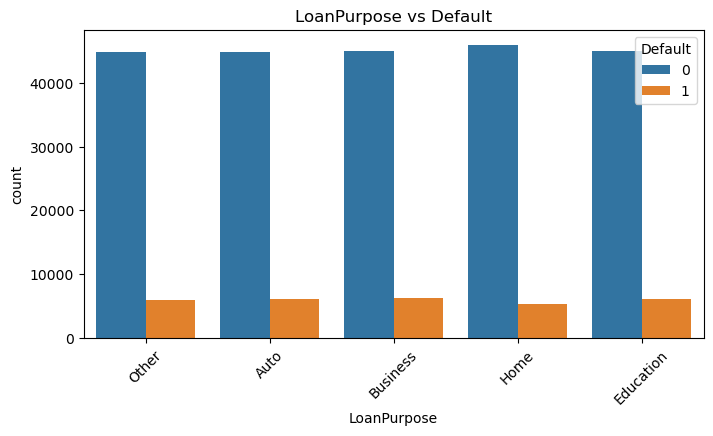

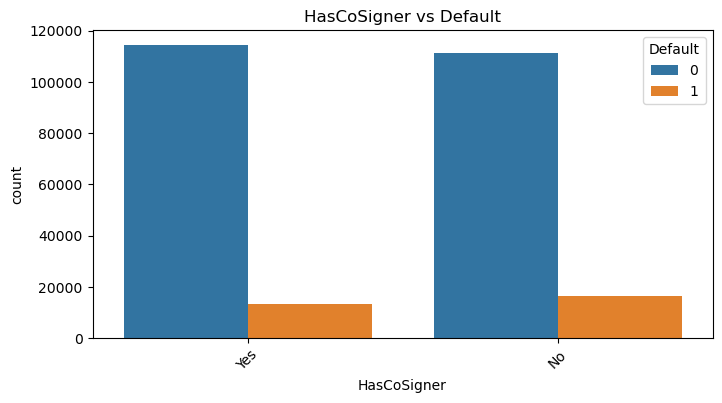

In [53]:
for col in categorical_columns: 
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Default', data=lending_df)
    plt.title(f'{col} vs Default')
    plt.xticks(rotation=45)
    plt.show()

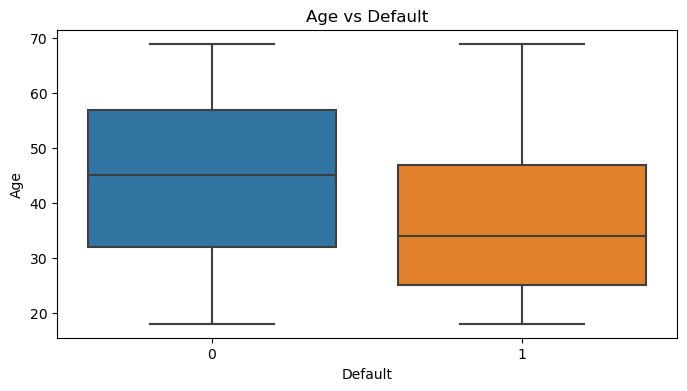

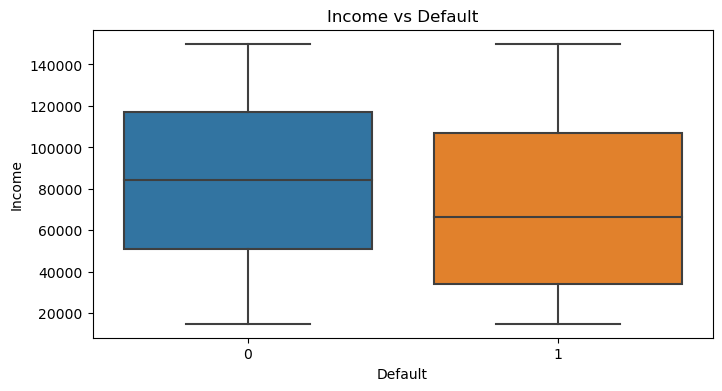

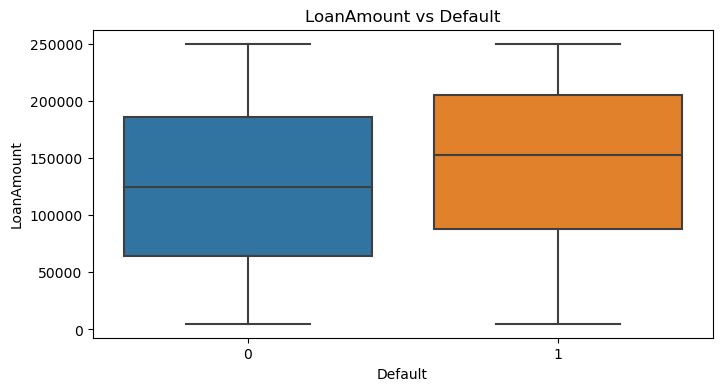

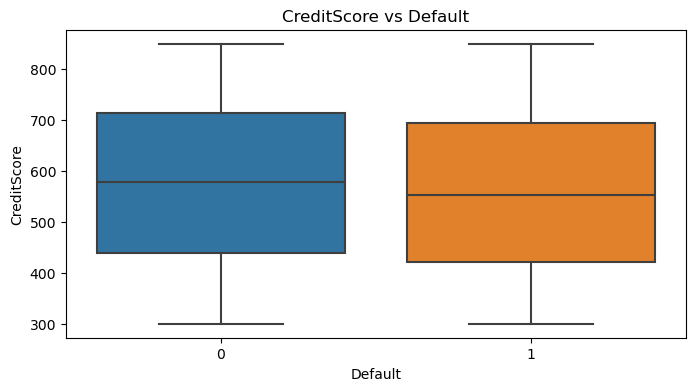

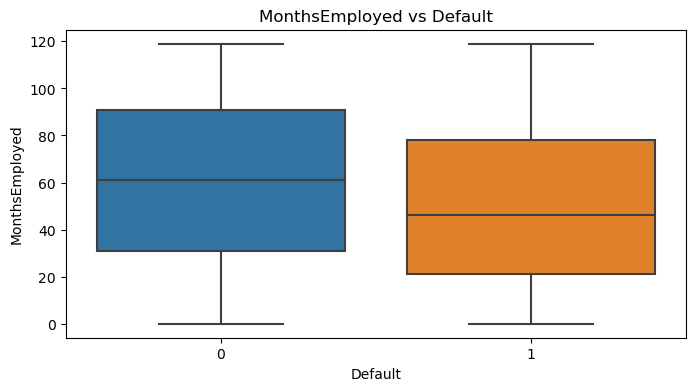

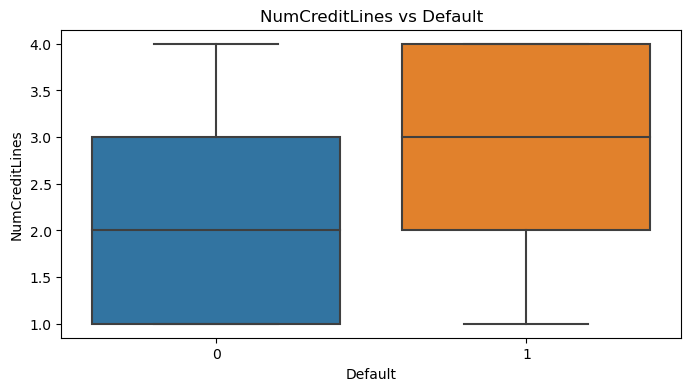

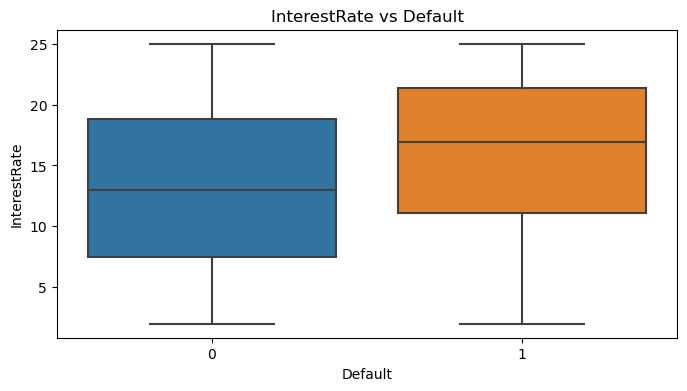

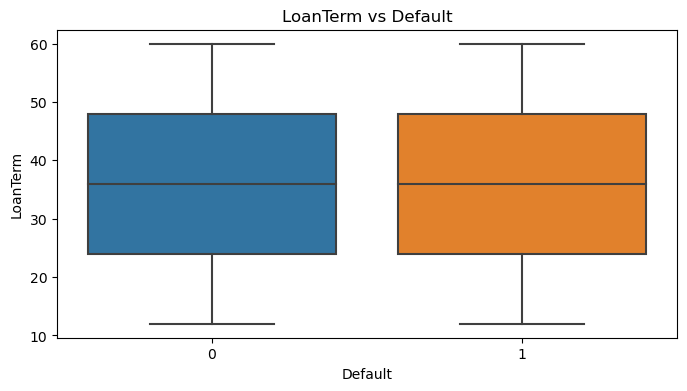

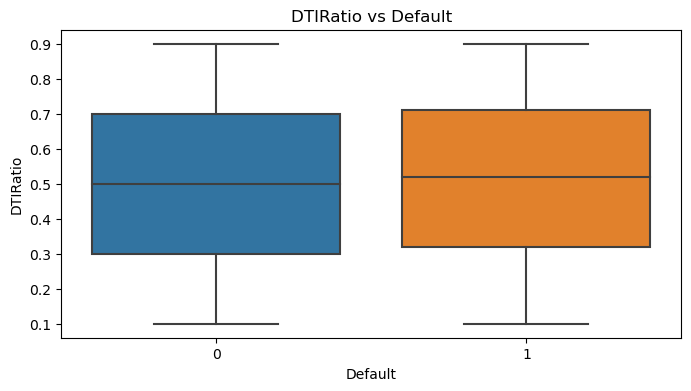

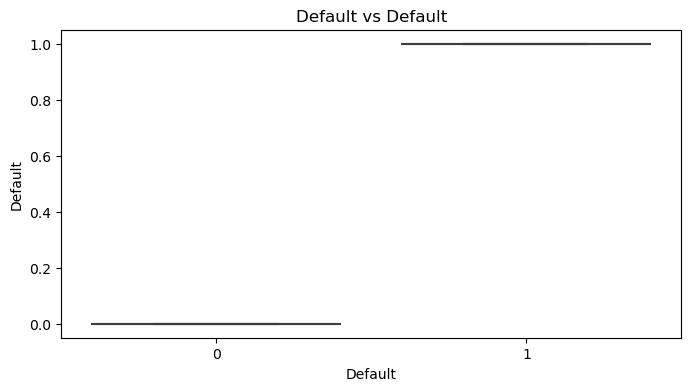

In [54]:
for col in numerical_columns: 
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Default', y=col, data=lending_df)
    plt.title(f'{col} vs Default')
    plt.show()


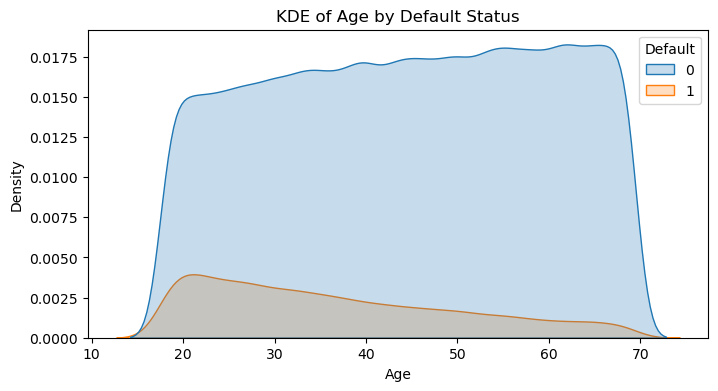

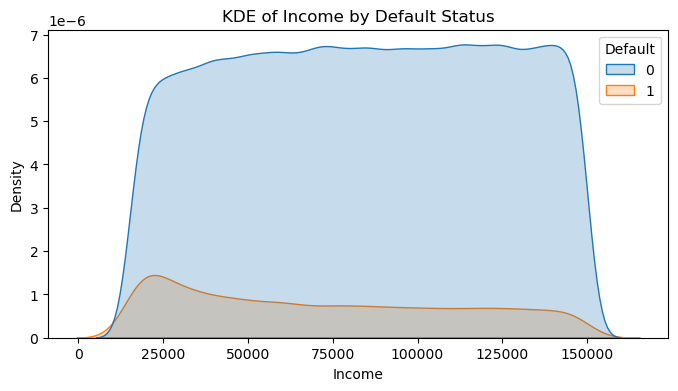

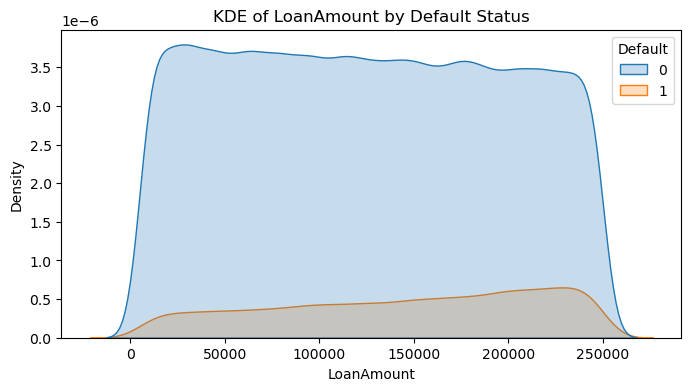

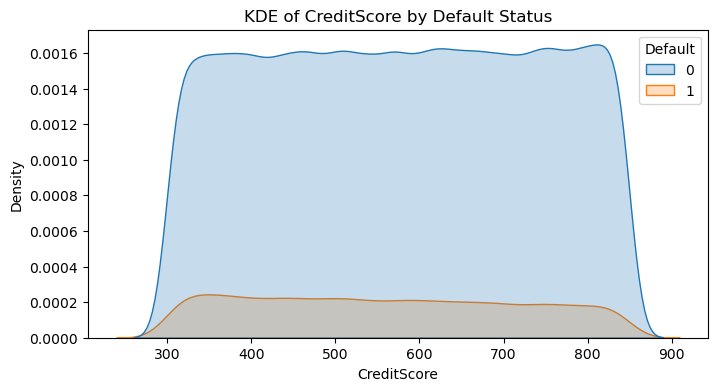

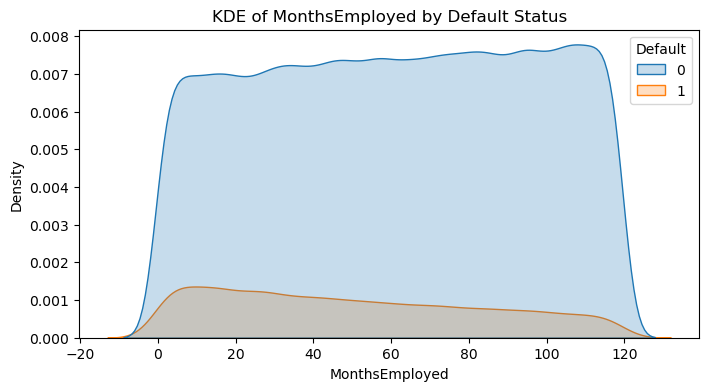

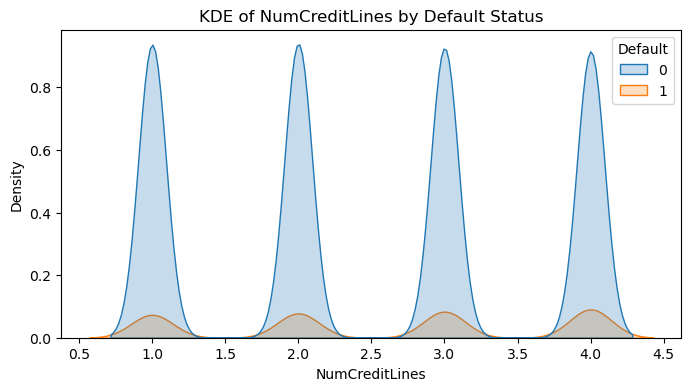

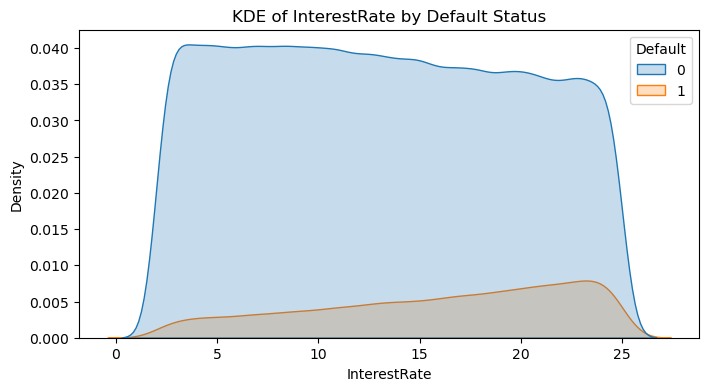

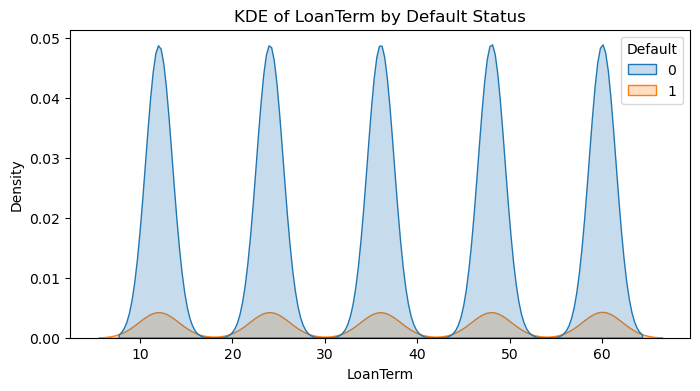

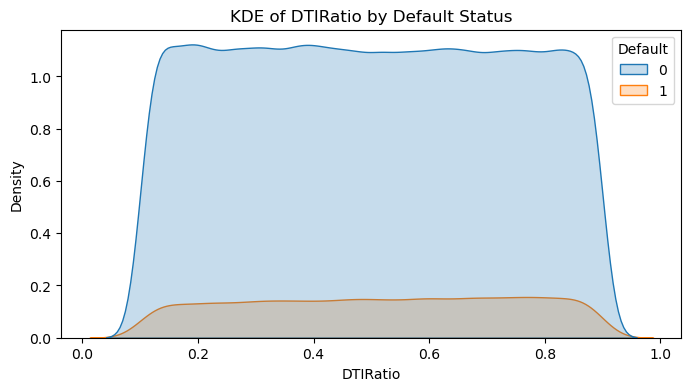

C:\Users\ChazinBrahma\AppData\Local\Temp\ipykernel_32892\3146493479.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=lending_df, x=col, hue='Default', fill=True)


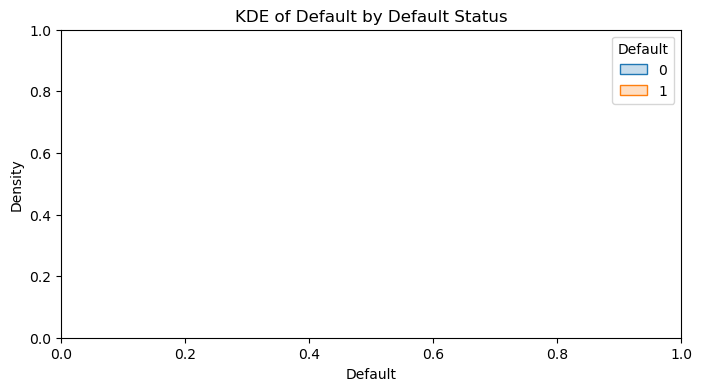

In [55]:
for col in numerical_columns: 
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=lending_df, x=col, hue='Default', fill=True)
    plt.title(f'KDE of {col} by Default Status')
    plt.show()

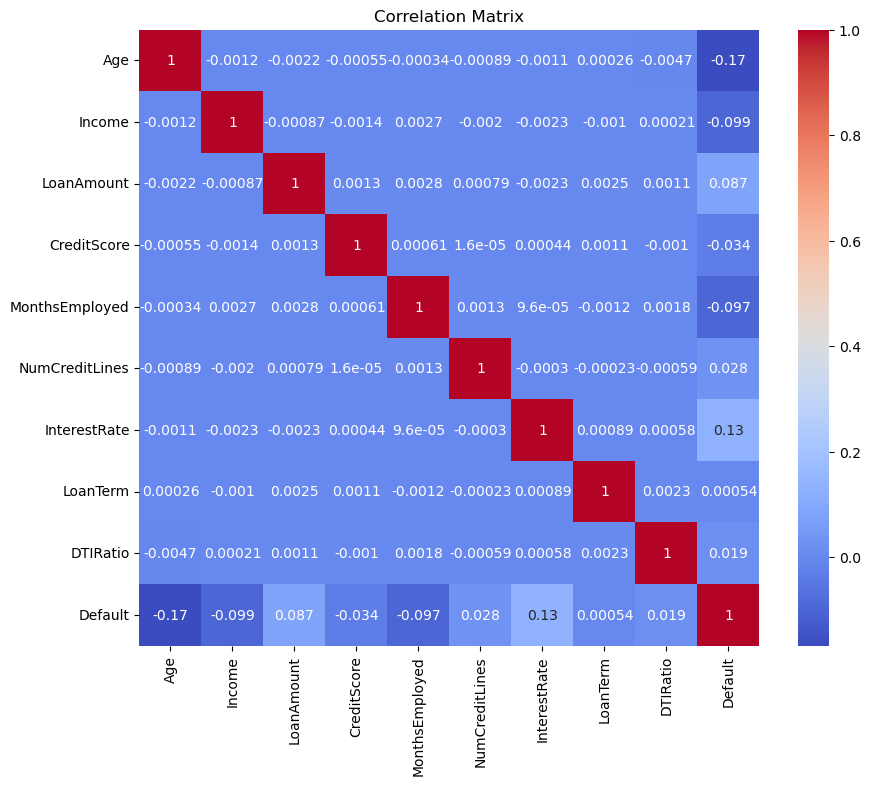

In [56]:
numeric_df = lending_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [57]:
label_encoder = LabelEncoder()
for column in categorical_columns:
     if X[column].dtype == 'object':
         X[column] = label_encoder.fit_transform(X[column])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
param_grid = { 
    'max_depth': [3, 5, 10,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'criterion':['gini','entropy']
}

In [88]:
dt_model = DecisionTreeClassifier(random_state=42)

In [89]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [90]:
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [91]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [93]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.88
Classification Report
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45081
           1       0.70      0.02      0.04      5989

    accuracy                           0.88     51070
   macro avg       0.79      0.51      0.49     51070
weighted avg       0.86      0.88      0.83     51070



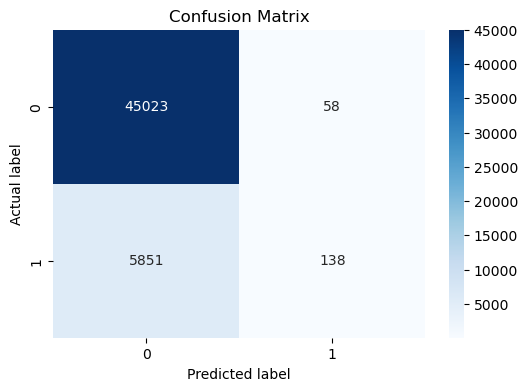

In [96]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [100]:
joblib.dump(best_model, 'best_loan_default_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [102]:
loaded_model = joblib.load('best_loan_default_model.pkl')
print("Model loaded successfully!")

Model loaded successfully!


In [104]:
y_pred = loaded_model.predict(X_test)

In [106]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45081
           1       0.70      0.02      0.04      5989

    accuracy                           0.88     51070
   macro avg       0.79      0.51      0.49     51070
weighted avg       0.86      0.88      0.83     51070



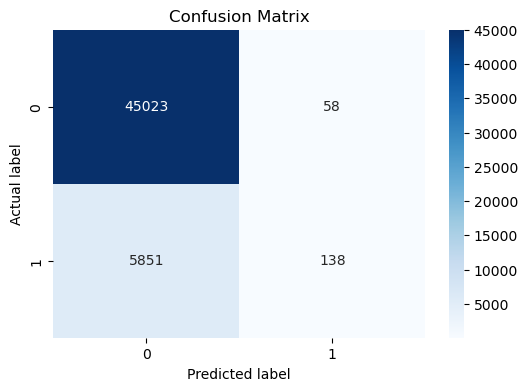

In [110]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [116]:
new_predictions = loaded_model.predict(X_test)


In [124]:
predictions_df = pd.DataFrame(new_predictions, columns=['Predicted Default'])

print(predictions_df.head())

   Predicted Default
0                  0
1                  0
2                  0
3                  0
4                  0


In [126]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)

results_df = pd.concat([X_test_df.reset_index(drop=True), predictions_df], axis=1)

print(results_df.head())

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   69  100979      150300          586             111               3   
1   69   79828      120956          722              55               3   
2   54   58544       41798          488              70               1   
3   20  139684      143241          539             115               4   
4   39   44251      178310          368              49               2   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         11.71        12      0.40          0               2              1   
1         17.92        60      0.60          1               3              0   
2         14.58        12      0.59          1               2              2   
3         17.28        36      0.33          3               2              1   
4         20.37        60      0.44          2               2              0   

   HasMortgage  HasDependents  LoanPurpose  HasCoSigner  Predi

In [128]:
defaulted_loans = results_df[results_df['Predicted Default'] == 1]

print(defaulted_loans.head())

     Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
305   38   16966      188671          484             100               4   
313   37   19158      183394          709              43               2   
638   24   19588      200421          650             101               1   
760   19   15206      181239          408              70               2   
949   28   15334      151088          346               8               1   

     InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  \
305         24.34        24      0.45          2               0   
313         15.55        12      0.68          3               0   
638         24.89        48      0.19          1               2   
760         23.87        48      0.12          1               0   
949         23.51        24      0.40          1               1   

     MaritalStatus  HasMortgage  HasDependents  LoanPurpose  HasCoSigner  \
305              0            1              0      

In [136]:
y_test_df = pd.DataFrame(y_test, columns=['Default'])

results_with_actual = pd.concat([results_df.reset_index(drop=True), y_test_df.reset_index(drop=True)], axis=1)

print(results_with_actual.head())

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   69  100979      150300          586             111               3   
1   69   79828      120956          722              55               3   
2   54   58544       41798          488              70               1   
3   20  139684      143241          539             115               4   
4   39   44251      178310          368              49               2   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         11.71        12      0.40          0               2              1   
1         17.92        60      0.60          1               3              0   
2         14.58        12      0.59          1               2              2   
3         17.28        36      0.33          3               2              1   
4         20.37        60      0.44          2               2              0   

   HasMortgage  HasDependents  LoanPurpose  HasCoSigner  Predi

In [138]:
defaulted_loans = results_with_actual[results_with_actual['Predicted Default'] == 1]

print(defaulted_loans.head())

     Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
305   38   16966      188671          484             100               4   
313   37   19158      183394          709              43               2   
638   24   19588      200421          650             101               1   
760   19   15206      181239          408              70               2   
949   28   15334      151088          346               8               1   

     InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  \
305         24.34        24      0.45          2               0   
313         15.55        12      0.68          3               0   
638         24.89        48      0.19          1               2   
760         23.87        48      0.12          1               0   
949         23.51        24      0.40          1               1   

     MaritalStatus  HasMortgage  HasDependents  LoanPurpose  HasCoSigner  \
305              0            1              0      